# FEATURE ENGINEERING & DATA PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
def load_application_train(): #Büyük Verilerde kullanılacak fonksiyon
    data = pd.read_csv("datasets/application_train.csv")
    return data

In [4]:
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data

In [7]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
# 1. Outliers (Aykırı Değerler)

In [ ]:
# Aykırı Değerleri Yakalama

In [ ]:
# Grafik Teknikle Aykırı Değerler

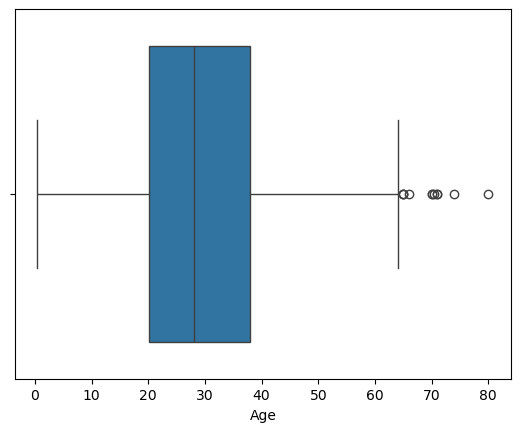

In [8]:
sns.boxplot(x=df["Age"])
plt.show()

In [ ]:
# Aykırı Değerler Nasıl Yakalanır?

In [11]:
q1 = df["Age"].quantile(0.25)
q1

20.125

In [12]:
q3 = df["Age"].quantile(0.75)
q3

38.0

In [13]:
iqr = q3 - q1
iqr

17.875

In [14]:
up = q3 + 1.5 * iqr
up

64.8125

In [15]:
low = q1 - 1.5 * iqr
low

-6.6875

In [16]:
df[(df["Age"] < low) | (df["Age"] > up)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [17]:
df[(df["Age"] < low) | (df["Age"] > up)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [ ]:
# İşlemleri Fonksiyonlaştırmak

In [18]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [20]:
outlier_thresholds(df, "Fare")

(-26.724, 65.6344)

In [21]:
low, up = outlier_thresholds(df, "Fare")

In [22]:
df[(df["Fare"] < low) | (df["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [23]:
df[(df["Fare"] < low) | (df["Fare"] > up)].index

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

In [24]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [25]:
check_outlier(df, "Age")

True

In [26]:
check_outlier(df, "Fare")

True

In [ ]:
# grab_col_names

In [27]:
dff = load_application_train()

In [28]:
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [29]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}') # Burası sadece raporlama içinde verilmiştir. cat_cols içinde yer almaktadır.
    return cat_cols, num_cols, cat_but_car

In [40]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [31]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [32]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [34]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [35]:
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [ ]:
# Aykırı Değerlerin Kendilerine Erişmek

In [41]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [42]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [43]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [44]:
age_index = grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [45]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [46]:
check_outlier(df, "Age")

True

In [47]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [ ]:
# Aykırı Değer Problemini Çözme

In [ ]:
# Silme

In [48]:
low, up = outlier_thresholds(df, "Fare")

In [49]:
df.shape # Ayrıkı değerlerle birlikte olan boyut sayısı

(891, 12)

In [50]:
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape # Aykırık değerleri sildikten sonra kalacak olan değer sayısı

(775, 12)

In [55]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [52]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [53]:
df.shape

(891, 12)

In [56]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [57]:
df.shape[0] - new_df.shape[0]

116

In [ ]:
# Baskılama Yöntemi (re-assignment with thresholds)

In [58]:
low, up = outlier_thresholds(df, "Fare")

In [59]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [60]:
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"]

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [61]:
df.loc[(df["Fare"] > up), "Fare"] = up

In [62]:
df.loc[(df["Fare"] < low), "Fare"] = low

In [63]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [64]:
df = load()

In [65]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [66]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [67]:
df.shape

(891, 12)

In [68]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age True
Fare True


In [69]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [70]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
Fare False


In [ ]:
# Recap

In [71]:
df = load()
outlier_thresholds(df, "Age")
check_outlier(df, "Age")
grab_outliers(df, "Age", index=True)

remove_outlier(df, "Age").shape
replace_with_thresholds(df, "Age")
check_outlier(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


False

In [ ]:
# Çok Değişkenli Aykırı Değer Analizi: Local Outlier Factor

In [72]:
df = sns.load_dataset('diamonds')

In [73]:
df = df.select_dtypes(include=['float64', 'int64'])

In [74]:
df = df.dropna()

In [75]:
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [76]:
df.shape

(53940, 7)

In [77]:
for col in df.columns:
    print(col, check_outlier(df, col))

carat True
depth True
table True
price True
x True
y True
z True


In [78]:
low, up = outlier_thresholds(df, "carat")

In [79]:
df[((df["carat"] < low) | (df["carat"] > up))].shape

(1889, 7)

In [80]:
low, up = outlier_thresholds(df, "depth")

In [81]:
df[((df["depth"] < low) | (df["depth"] > up))].shape

(2545, 7)

In [82]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [83]:
df_scores = clf.negative_outlier_factor_

In [84]:
df_scores[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [85]:
# df_scores = -df_scores
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

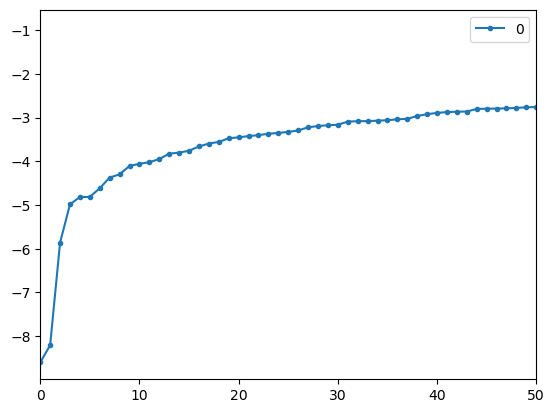

In [86]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [87]:
th = np.sort(df_scores)[3]

In [88]:
df[df_scores < th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [89]:
df[df_scores < th].shape

(3, 7)

In [90]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


In [91]:
df[df_scores < th].index

Index([41918, 48410, 49189], dtype='int64')

In [92]:
df[df_scores < th].drop(axis=0, labels=df[df_scores < th].index)

,carat,depth,table,price,x,y,z


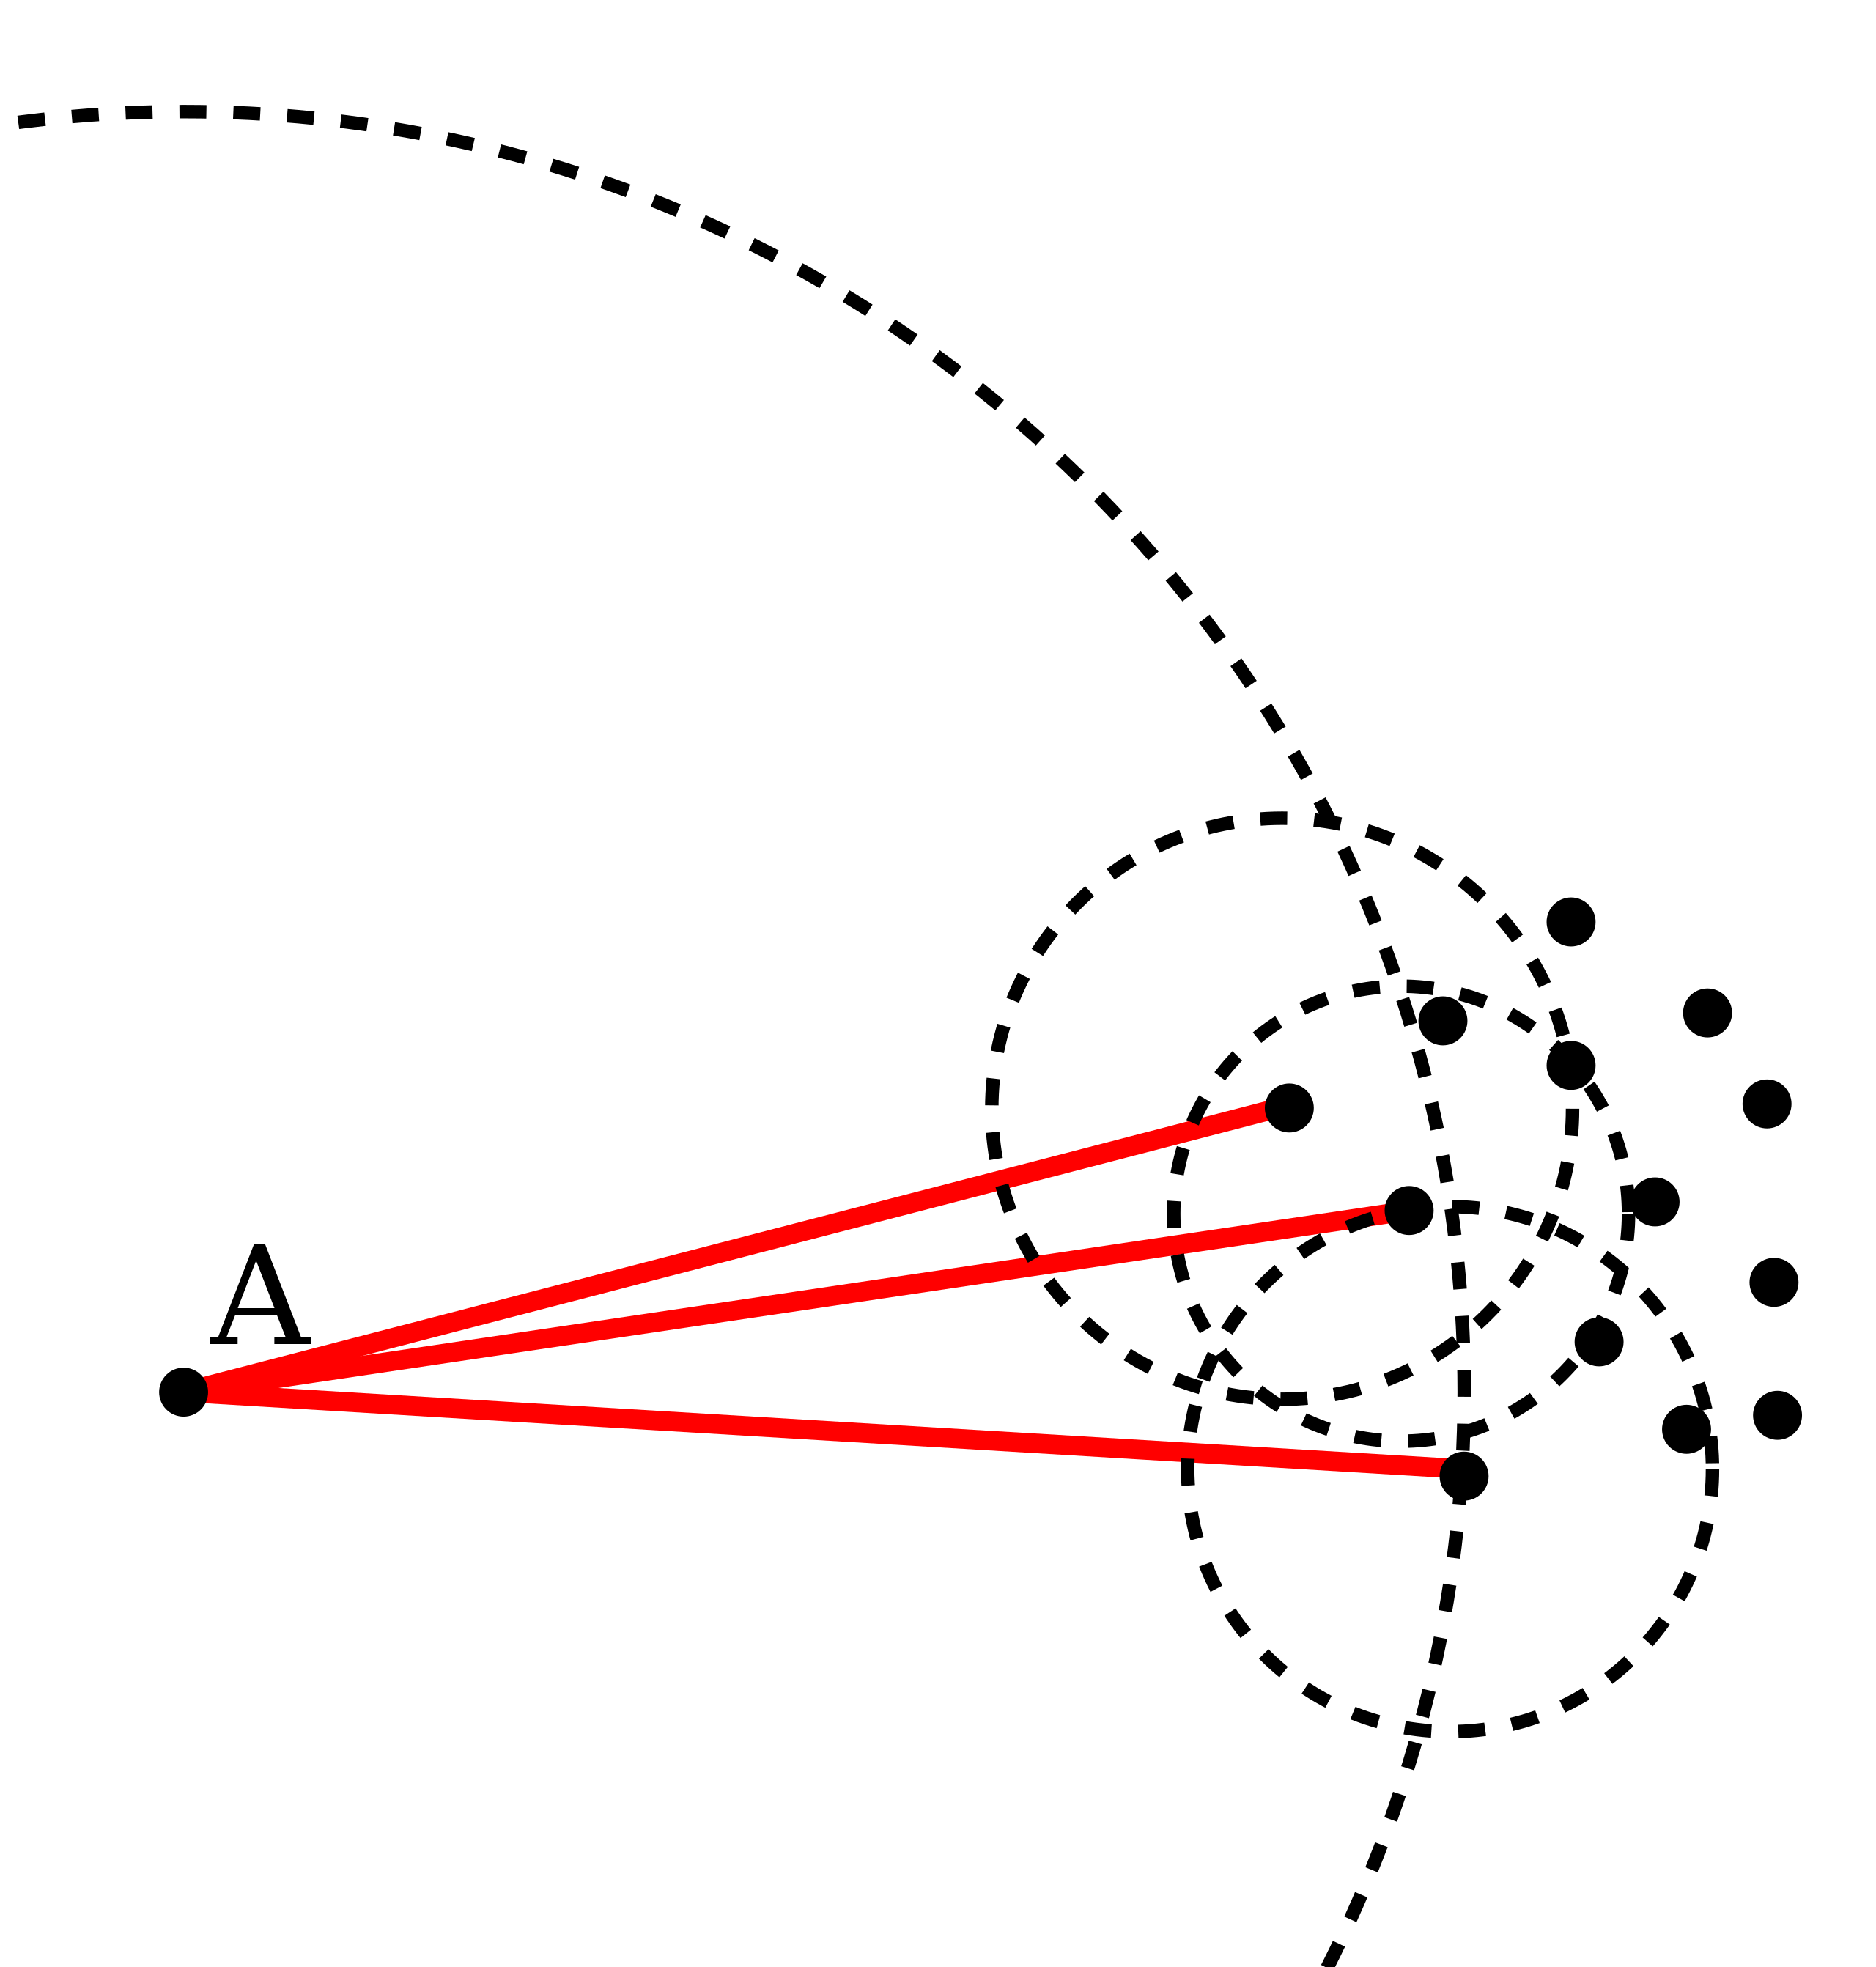

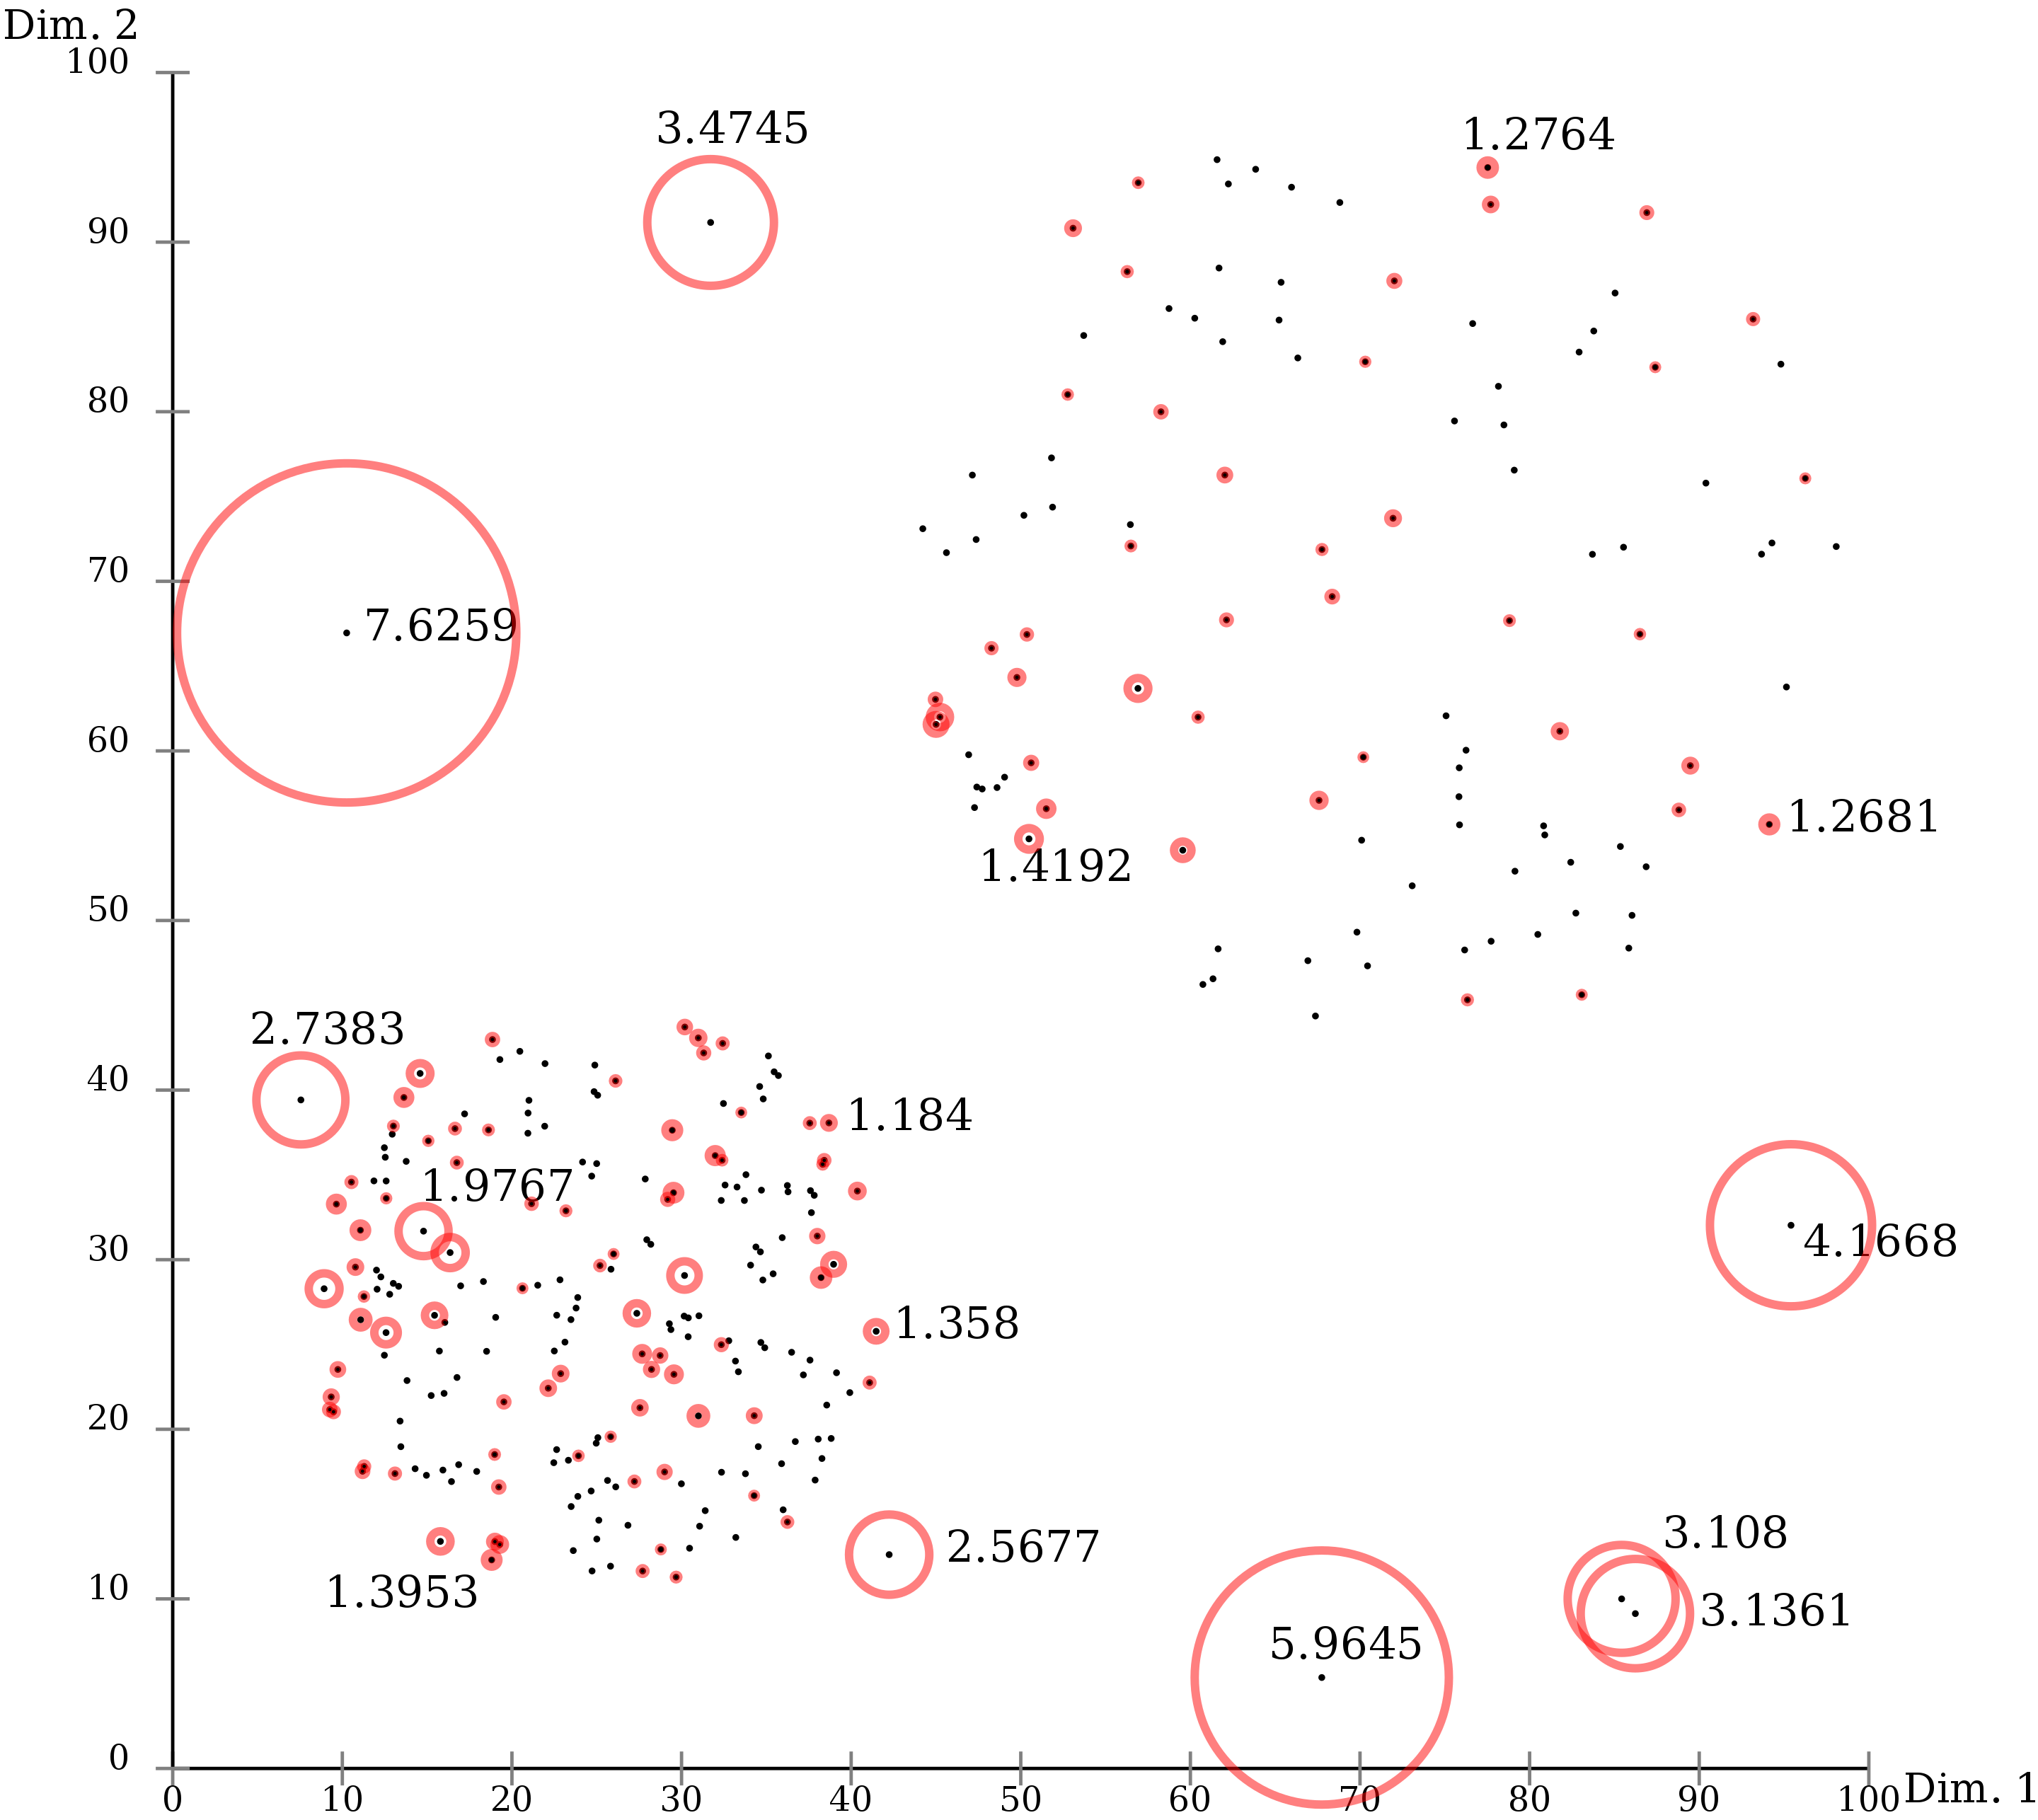

In [ ]:
# Missing Values (Eksik Değerler)

In [ ]:
# Eksik Değerlerin Yakalanması

In [93]:
df = load()

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [95]:
# eksik gozlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [96]:
# degiskenlerdeki eksik deger sayisi
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
# degiskenlerdeki tam deger sayisi
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [98]:
# veri setindeki toplam eksik deger sayisi
df.isnull().sum().sum()

866

In [99]:
# en az bir tane eksik degere sahip olan gözlem birimleri
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


In [100]:
# tam olan gözlem birimleri
df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000,0,0,248698,13.000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000,0,0,113788,35.500,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C


In [101]:
# Azalan şekilde sıralamak
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [102]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [103]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

In [104]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [105]:
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [106]:
missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

In [ ]:
#############################################
# Eksik Değer Problemini Çözme
#############################################

In [107]:
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [108]:
###################
# Çözüm 1: Hızlıca silmek
###################
df.dropna().shape

(183, 12)

In [ ]:
###################
# Çözüm 2: Basit Atama Yöntemleri ile Doldurmak
###################

In [109]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()

0

In [111]:
df["Age"].fillna(df["Age"].median()).isnull().sum()

0

In [112]:
df["Age"].fillna(0).isnull().sum()

0

In [113]:
# df.apply(lambda x: x.fillna(x.mean()), axis=0)

df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [114]:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [115]:
dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [116]:
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

0

In [117]:
df["Embarked"].fillna("missing")

0            S
1            C
2            S
3            S
4            S
5            Q
6            S
7            S
8            S
9            C
10           S
11           S
12           S
13           S
14           S
15           S
16           Q
17           S
18           S
19           C
20           S
21           S
22           Q
23           S
24           S
25           S
26           C
27           S
28           Q
29           S
30           C
31           C
32           Q
33           S
34           C
35           S
36           C
37           S
38           S
39           C
40           S
41           S
42           C
43           C
44           Q
45           S
46           Q
47           Q
48           C
49           S
50           S
51           S
52           C
53           S
54           C
55           S
56           S
57           C
58           S
59           S
60           C
61     missing
62           S
63           S
64           C
65           C
66        

In [118]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
###################
# Kategorik Değişken Kırılımında Değer Atama
###################

In [119]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [120]:
df["Age"].mean()

29.69911764705882

In [121]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [122]:
df.groupby("Sex")["Age"].mean()["female"]

27.915708812260537

In [123]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

In [124]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [125]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#############################################
# Çözüm 3: Tahmine Dayalı Atama ile Doldurma
#############################################

In [126]:
df = load()

In [127]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [128]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [129]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [130]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,True,False,True
1,1,1,1,0,38.000,71.283,False,False,False
2,1,3,0,0,26.000,7.925,False,False,True
3,1,1,1,0,35.000,53.100,False,False,True
4,0,3,0,0,35.000,8.050,True,False,True


In [ ]:
# değişkenlerin standartlatırılması

In [131]:
scaler = MinMaxScaler()

In [132]:
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [ ]:
# knn'in uygulanması.

In [133]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [134]:
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [135]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [136]:
df["age_imputed_knn"] = dff[["Age"]]

In [137]:
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600
29,NaN,24.400
31,NaN,29.600
32,NaN,17.600
36,NaN,21.800
42,NaN,28.700


In [138]:
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,47.800
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,37.600
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,12.200
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C,32.800
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q,17.600
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.896,NaN,S,24.400
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C,29.600
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.750,NaN,Q,17.600
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.229,NaN,C,21.800
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.896,NaN,C,28.700


In [139]:

###################
# Recap
###################

df = load()
# missing table
missing_values_table(df)
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


0

In [ ]:
#############################################
# Gelişmiş Analizler
#############################################

In [ ]:
###################
# Eksik Veri Yapısının İncelenmesi
###################

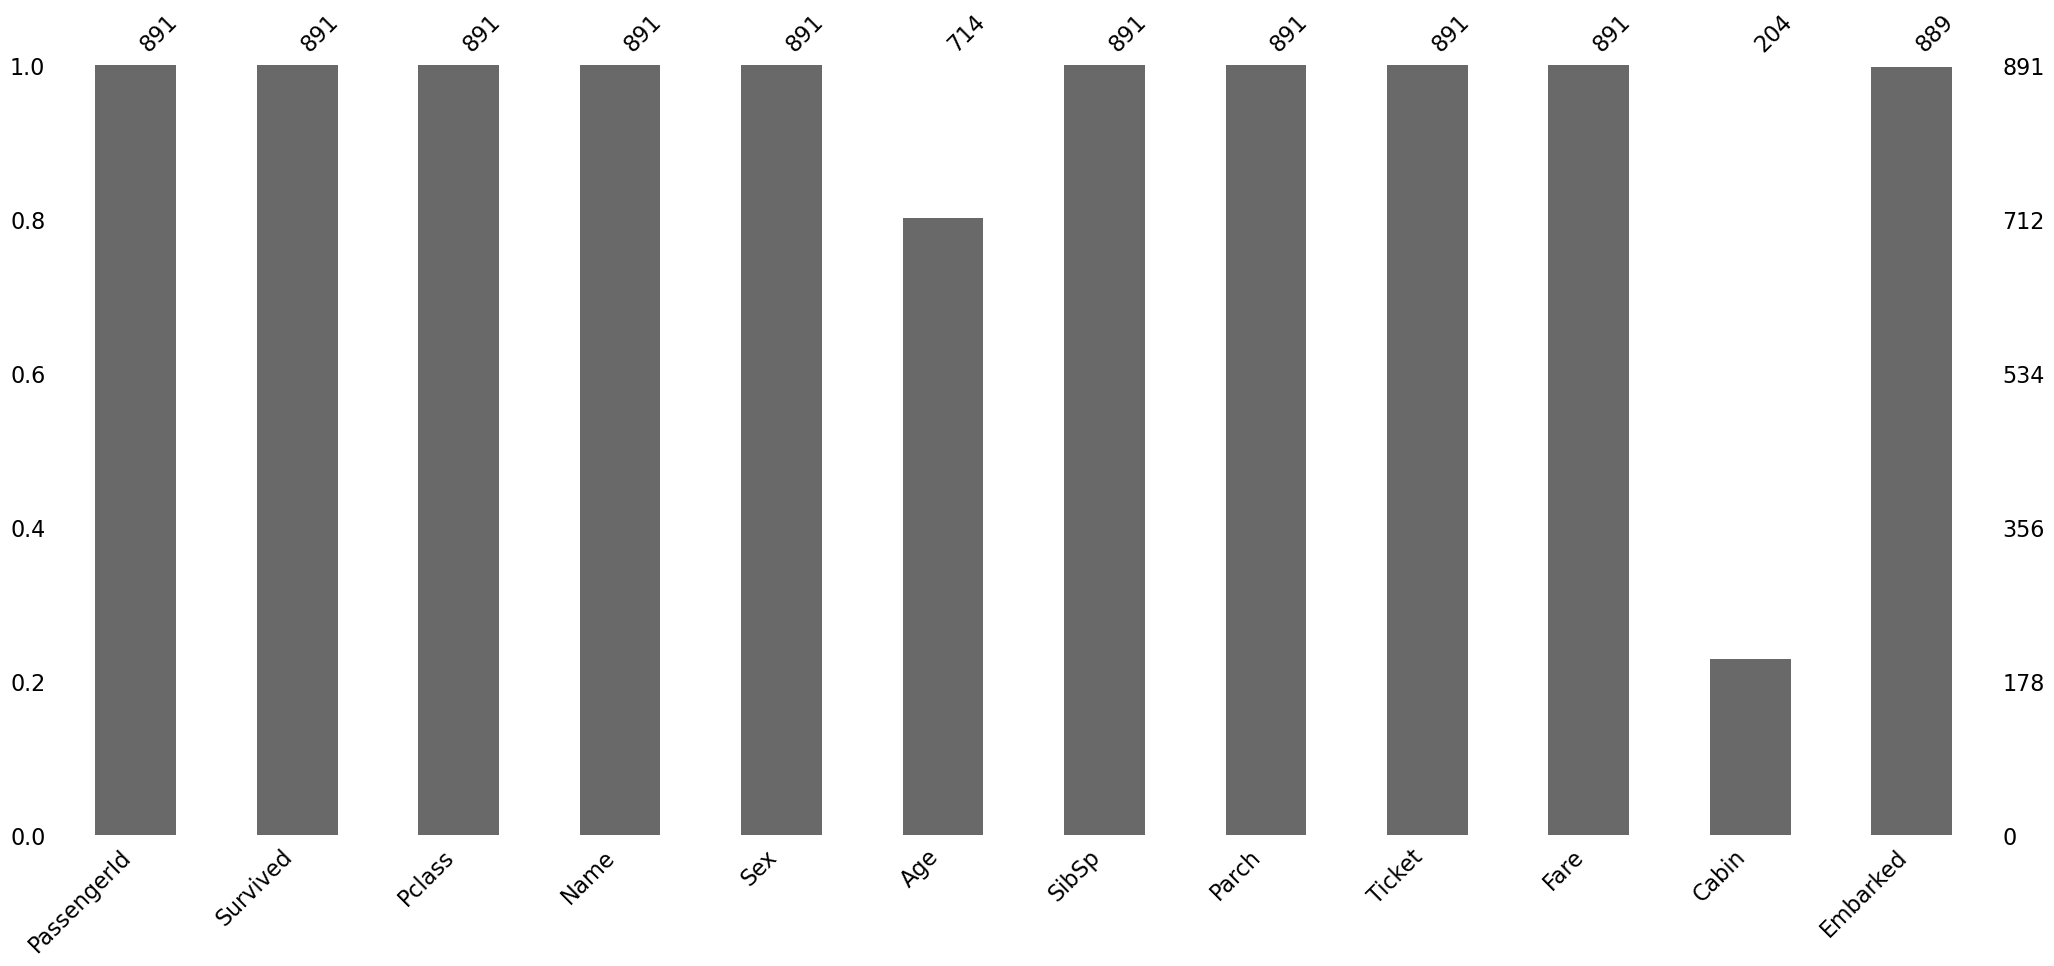

In [140]:
msno.bar(df)
plt.show()

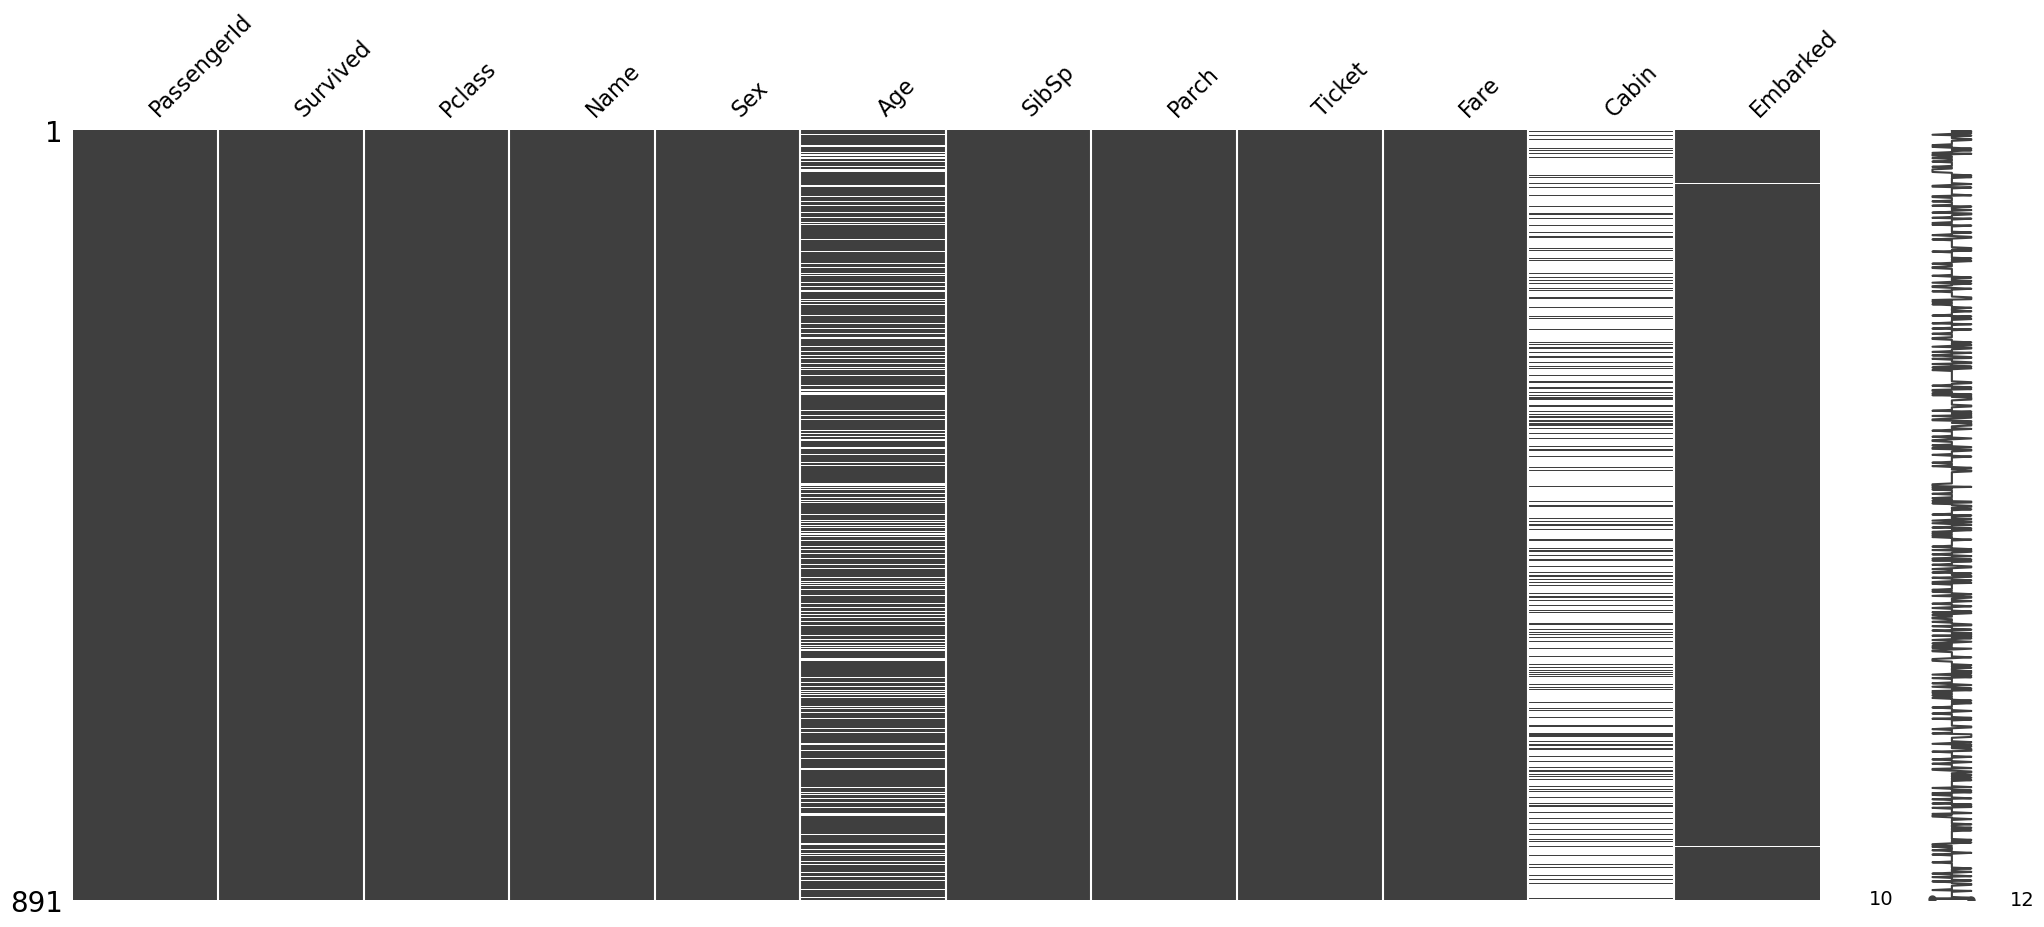

In [141]:
msno.matrix(df)
plt.show()

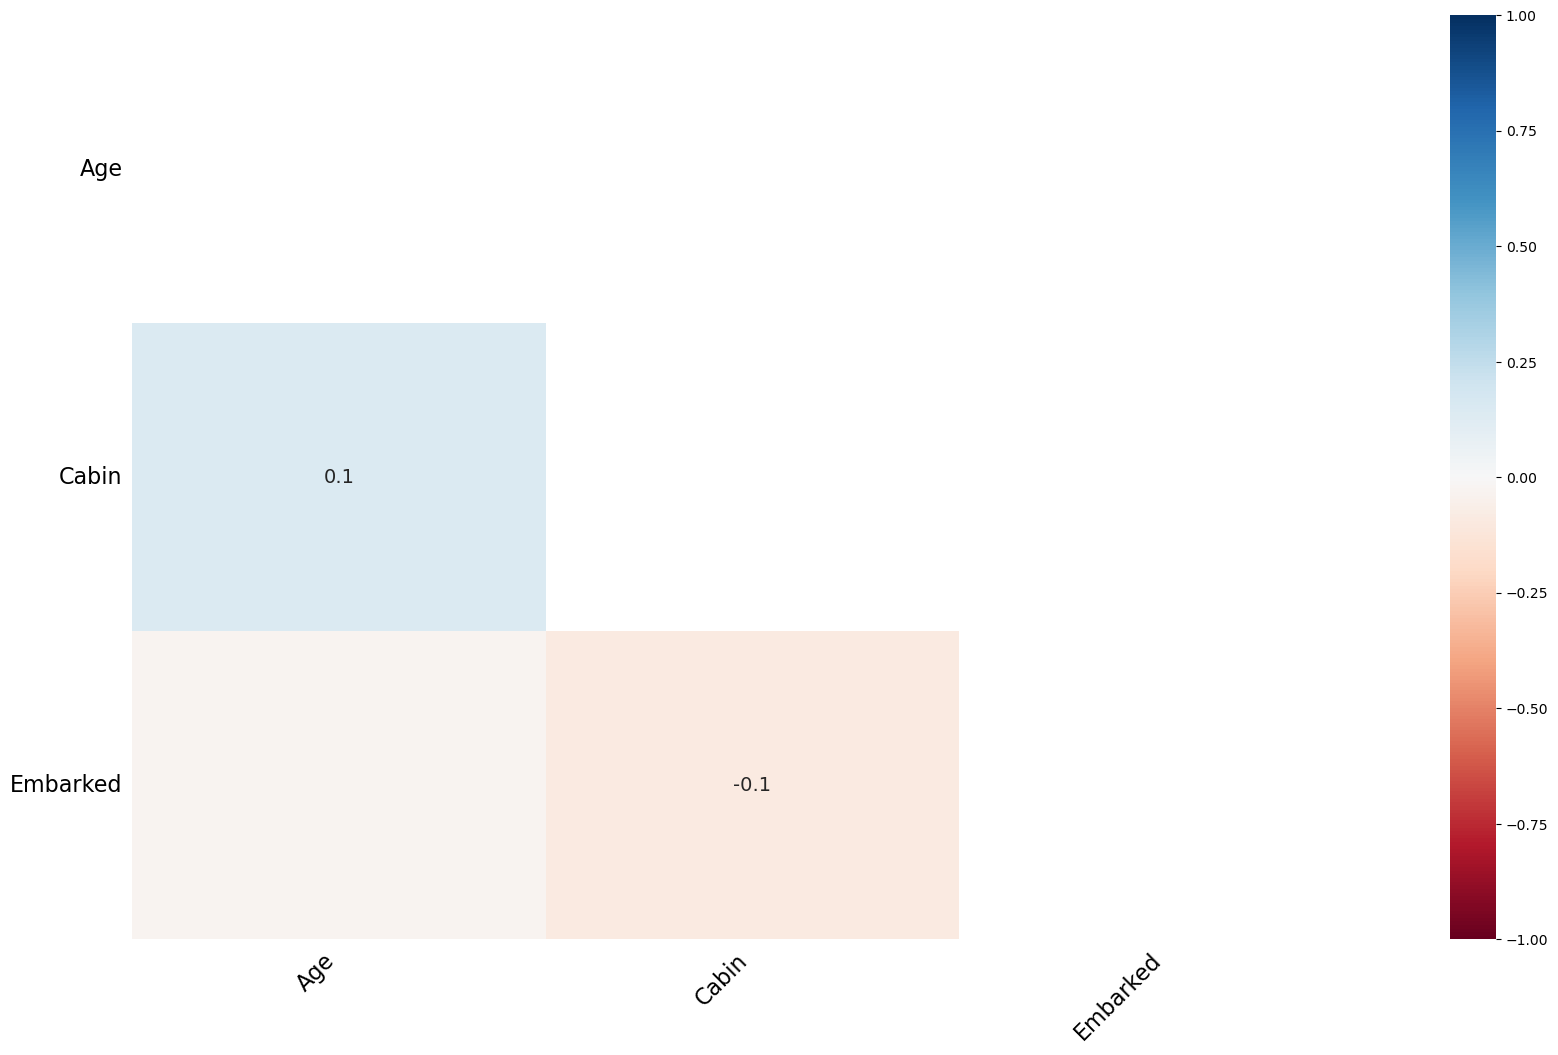

In [142]:
msno.heatmap(df)
plt.show()

In [ ]:

###################
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi
###################

In [143]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [144]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [145]:
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




In [146]:

###################
# Recap
###################

df = load()
na_cols = missing_values_table(df, True)
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma
missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




In [ ]:
#############################################
# 3. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
#############################################

#############################################
# Label Encoding & Binary Encoding
#############################################

In [147]:
df = load()

In [148]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [149]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [150]:
le = LabelEncoder()

In [151]:
le.fit_transform(df["Sex"])[0:5]
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [152]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [153]:
df = load()

In [154]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [155]:
for col in binary_cols:
    label_encoder(df, col)

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [157]:
df = load_application_train()

In [158]:
df.shape

(307511, 122)

In [159]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [160]:
df[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [161]:
for col in binary_cols:
    label_encoder(df, col)

In [162]:
df = load()

In [163]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [164]:
df["Embarked"].nunique()

3

In [165]:
len(df["Embarked"].unique())

4

In [ ]:
#############################################
# One-Hot Encoding
#############################################

In [166]:
df = load()

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [168]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [169]:
pd.get_dummies(df, columns=["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,False,False,True


In [170]:
pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,False,True


In [171]:
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,False,False,True,False


In [172]:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,True,False,True


In [173]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [174]:
df = load()

In [ ]:
# cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [175]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [176]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [177]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
#############################################
# Rare Encoding
#############################################

# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
# 3. Rare encoder yazacağız.

In [ ]:
###################
# 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.
###################

In [178]:
df = load_application_train()

In [179]:
df["NAME_EDUCATION_TYPE"].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [180]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [181]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [182]:
for col in cat_cols:
    cat_summary(df, col)

                    NAME_CONTRACT_TYPE  Ratio
NAME_CONTRACT_TYPE                           
Cash loans                      278232 90.479
Revolving loans                  29279  9.521
##########################################
             CODE_GENDER  Ratio
CODE_GENDER                    
F                 202448 65.834
M                 105059 34.164
XNA                    4  0.001
##########################################
              FLAG_OWN_CAR  Ratio
FLAG_OWN_CAR                     
N                   202924 65.989
Y                   104587 34.011
##########################################
                 FLAG_OWN_REALTY  Ratio
FLAG_OWN_REALTY                        
Y                         213312 69.367
N                          94199 30.633
##########################################
                 NAME_TYPE_SUITE  Ratio
NAME_TYPE_SUITE                        
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            1

In [ ]:
###################
# 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.
###################

In [183]:
df["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [184]:
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [185]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [186]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT  RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                            
Cash loans          278232  0.905        0.083
Revolving loans      29279  0.095        0.055


CODE_GENDER : 3
              COUNT  RATIO  TARGET_MEAN
CODE_GENDER                            
F            202448  0.658        0.070
M            105059  0.342        0.101
XNA               4  0.000        0.000


FLAG_OWN_CAR : 2
               COUNT  RATIO  TARGET_MEAN
FLAG_OWN_CAR                            
N             202924  0.660        0.085
Y             104587  0.340        0.072


FLAG_OWN_REALTY : 2
                  COUNT  RATIO  TARGET_MEAN
FLAG_OWN_REALTY                            
N                 94199  0.306        0.083
Y                213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
NAME_TYPE_SUITE                            
Children           3267  0.011        0.074
Family            40149  0.131      

In [ ]:
#############################################
# 3. Rare encoder'ın yazılması.
#############################################

In [187]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [188]:
new_df = rare_encoder(df, 0.01)

In [189]:
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT  RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                            
Cash loans          278232  0.905        0.083
Revolving loans      29279  0.095        0.055


CODE_GENDER : 3
              COUNT  RATIO  TARGET_MEAN
CODE_GENDER                            
F            202448  0.658        0.070
M            105059  0.342        0.101
Rare              4  0.000        0.000


FLAG_OWN_CAR : 2
               COUNT  RATIO  TARGET_MEAN
FLAG_OWN_CAR                            
N             202924  0.660        0.085
Y             104587  0.340        0.072


FLAG_OWN_REALTY : 2
                  COUNT  RATIO  TARGET_MEAN
FLAG_OWN_REALTY                            
N                 94199  0.306        0.083
Y                213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
NAME_TYPE_SUITE                            
Children           3267  0.011        0.074
Family            40149  0.131      

In [190]:
df["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [ ]:
###################
# StandardScaler: Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. z = (x - u) / s
###################

In [ ]:
#############################################
# Feature Scaling (Özellik Ölçeklendirme)
#############################################

In [191]:
df = load()

In [192]:
ss = StandardScaler()

In [193]:
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])

In [194]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


In [ ]:
###################
# RobustScaler: Medyanı çıkar iqr'a böl.
###################

In [195]:
rs = RobustScaler()

In [196]:
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


In [ ]:
###################
# MinMaxScaler: Verilen 2 değer arasında değişken dönüşümü
###################

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [198]:
mms = MinMaxScaler()

In [199]:
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [202]:
age_cols = [col for col in df.columns if "Age" in col]

In [203]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


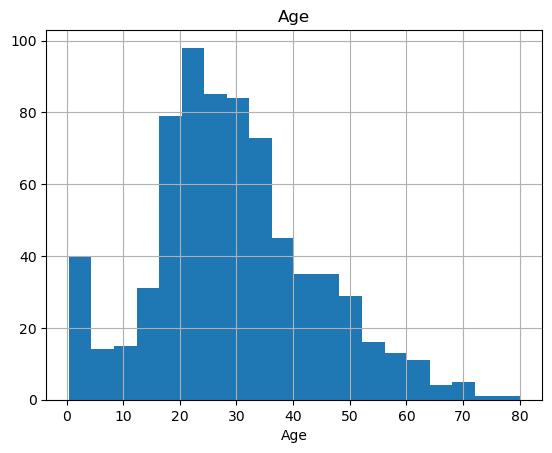

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


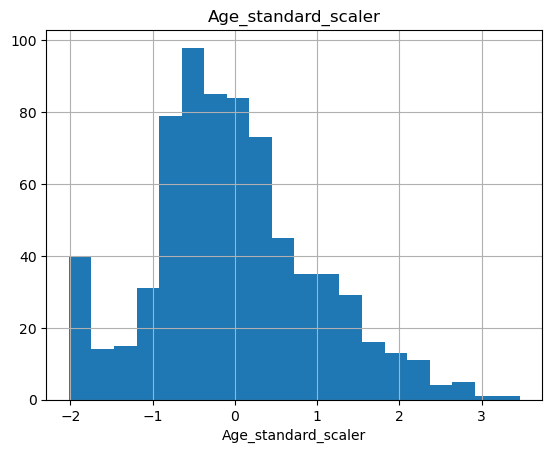

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


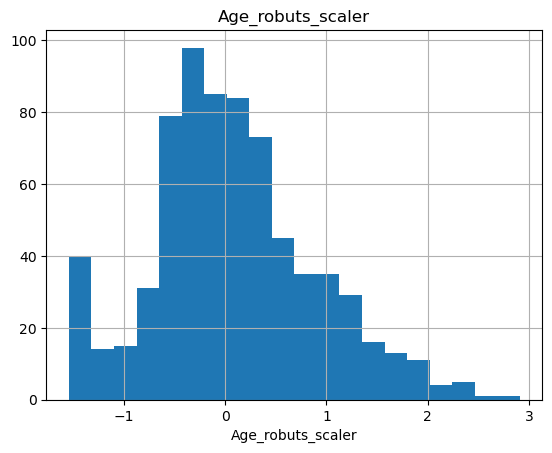

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


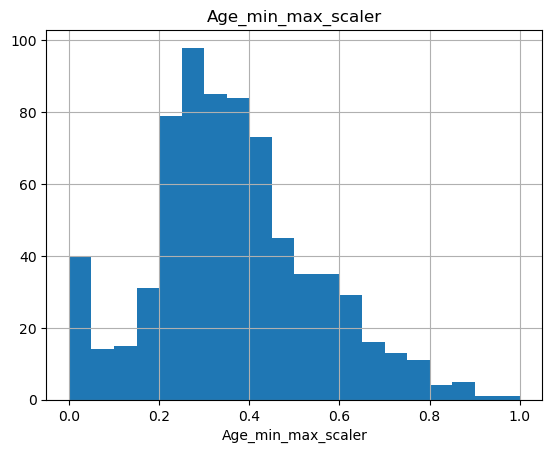

In [204]:
for col in age_cols:
    num_summary(df, col, plot=True)

In [ ]:
###################
# Numeric to Categorical: Sayısal Değişkenleri Kateorik Değişkenlere Çevirme
# Binning
###################

In [205]:
df["Age_qcut"] = pd.qcut(df['Age'], 5)

In [ ]:
#############################################
# Feature Extraction (Özellik Çıkarımı)
#############################################

#############################################
# Binary Features: Flag, Bool, True-False
#############################################

In [206]:
df = load()

In [207]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [209]:
df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype('int')

In [210]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived": "mean"})

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


In [212]:
from statsmodels.stats.proportion import proportions_ztest

In [213]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                            df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

In [214]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.4597, p-value = 0.0000


In [215]:
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"

In [216]:
df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"

In [217]:
df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})

,Survived
NEW_IS_ALONE,
NO,0.506
YES,0.304


In [218]:
test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],

                                      nobs=[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                            df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

In [219]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -6.0704, p-value = 0.0000


In [ ]:
#############################################
# Text'ler Üzerinden Özellik Türetmek
#############################################

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES


In [ ]:
###################
# Letter Count
###################

In [221]:
df["NEW_NAME_COUNT"] = df["Name"].str.len()

In [ ]:
###################
# Word Count
###################

In [222]:
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))

In [ ]:
###################
# Özel Yapıları Yakalamak
###################

In [223]:
df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [224]:
df.groupby("NEW_NAME_DR").agg({"Survived": ["mean","count"]})

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

In [ ]:
###################
# Regex ile Değişken Türetmek
###################

In [225]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0


In [227]:
df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/6l/1689rrm975gddmrdvvsjk0g80000gn/T/ipykernel_1621/4141255764.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['NEW_TITLE'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [228]:
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

In [ ]:
#############################################
# Date Değişkenleri Üretmek
#############################################

In [229]:
dff = pd.read_csv("datasets/course_reviews.csv")

In [230]:
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [231]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [232]:
dff['Timestamp'] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")

ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 07:45:55", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [233]:
# year
dff['year'] = dff['Timestamp'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# month
dff['month'] = dff['Timestamp'].dt.month

In [ ]:
# year diff
dff['year_diff'] = date.today().year - dff['Timestamp'].dt.year

In [ ]:
# month diff (iki tarih arasındaki ay farkı): yıl farkı + ay farkı
dff['month_diff'] = (date.today().year - dff['Timestamp'].dt.year) * 12 + date.today().month - dff['Timestamp'].dt.month

In [ ]:
# day name
dff['day_name'] = dff['Timestamp'].dt.day_name()

In [ ]:
dff.head()

# date

In [ ]:
#############################################
# Feature Interactions (Özellik Etkileşimleri)
#############################################

In [ ]:
df = load()

In [ ]:
df.head()

In [ ]:
df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]

In [ ]:
df["NEW_FAMILY_SIZE"] = df["SibSp"] + df["Parch"] + 1

In [ ]:
df.loc[(df['SEX'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'

In [ ]:
df.loc[(df['SEX'] == 'male') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturemale'

In [ ]:
df.loc[(df['SEX'] == 'male') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'

In [ ]:
df.loc[(df['SEX'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'

In [ ]:
df.loc[(df['SEX'] == 'female') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'

In [ ]:
df.loc[(df['SEX'] == 'female') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [ ]:
df.head()

In [ ]:
df.groupby("NEW_SEX_CAT")["Survived"].mean()